In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('large_countries_2015.csv',\
                 index_col=0)
df.population = round(df.population/1000000, 1)
df

,population,fertility,continent
Bangladesh,161.0,2.12,Asia
Brazil,207.8,1.78,South America
China,1376.0,1.57,Asia
India,1311.1,2.43,Asia
Indonesia,257.6,2.28,Asia
Japan,126.6,1.45,Asia
Mexico,127.0,2.13,North America
Nigeria,182.2,5.89,Africa
Pakistan,188.9,3.04,Asia
Philippines,100.7,2.98,Asia


Today we are going to talk about 3 different but related topics.

1. Aggreate functions in pandas
2. The groupby method of a pandas.DataFrame
3. Applying functions or transformations to pandas.Series

# Aggregate functions in pandas

**Aggregate function**: takes multiple rows as input and returns a single value

In [5]:
new = ['Brazil', 176.0, 2.0, 'South America'] #define a new random array
new = pd.DataFrame(new, columns=['']) #create a new df with no column name
new

,
0,Brazil
1,176
2,2
3,South America


In [6]:
df = df.append(df*2) # append a df under the original one with 2x content
df #observe that it also multiplies the strings

,population,fertility,continent
Bangladesh,161.0,2.12,Asia
Brazil,207.8,1.78,South America
China,1376.0,1.57,Asia
India,1311.1,2.43,Asia
Indonesia,257.6,2.28,Asia
Japan,126.6,1.45,Asia
Mexico,127.0,2.13,North America
Nigeria,182.2,5.89,Africa
Pakistan,188.9,3.04,Asia
Philippines,100.7,2.98,Asia


In [4]:
df.index.duplicated(keep='first') # indicates the duplicated index values. Options are pretty well documented
# indicates the duplicates except the first one.

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [20]:
df.groupby(df.index).first() #grouped "by" the index and used the first one

#used the first values of each group

,population,fertility,continent
Bangladesh,161.0,2.12,Asia
Brazil,207.8,1.78,South America
China,1376.0,1.57,Asia
India,1311.1,2.43,Asia
Indonesia,257.6,2.28,Asia
Japan,126.6,1.45,Asia
Mexico,127.0,2.13,North America
Nigeria,182.2,5.89,Africa
Pakistan,188.9,3.04,Asia
Philippines,100.7,2.98,Asia


In [21]:
df.count
df.count()

population    24
fertility     24
continent     24
dtype: int64

In [26]:
# aggregate functions will automatically chose the columns for which an aggreagation can be perforem
df.mean() #You can also select a single column or list of columns

population    563.02500
fertility       3.65625
dtype: float64

In [8]:
df.min()
# careful with this, it takes them from different rows. 
# You'd need to do your selection more carefully if you 
# needed 

population     100.7
fertility       1.45
continent     Africa
dtype: object

In [9]:
df.loc[df["population"]==df["population"].min(),:] # This just takes the lowest population row regardless
#whether the fertility is min or not

,population,fertility,continent
Philippines,100.7,2.98,Asia


In [29]:
# you can make subselections of columns 
# (because we are looking at a different DataFrame now).. the one with
# repeated index and df*2
df[['population', 'fertility']].max() #This also returns the strings

population    2752.00
fertility       11.78
dtype: float64

In [11]:
df.sum()

population                                              13512.6
fertility                                                 87.75
continent     AsiaSouth AmericaAsiaAsiaAsiaAsiaNorth America...
dtype: object

In [12]:
df.prod()

population    6.556519e+60
fertility     1.205710e+12
dtype: float64

In [13]:
df.median()

population    272.30
fertility       3.09
dtype: float64

In [14]:
df.std()

population    731.519722
fertility       2.235597
dtype: float64

In [15]:
df["fertility"].var()
#variance = std**2
#standard_deviation = np.sqrt(sum(x-x_mean)**2/n)

4.997894021739129

In [30]:
df.quantile(.5)==df.median()
df["population"].quantile(1.0)==df["population"].max()

True

In [37]:
# apply a predefined set of aggregate functions
df.describe().loc["mean","fertility"]

3.6562499999999996

In [39]:
def myfun(x):
    for x in np.array(x):
        y=x*2
    return y
# apply a customized set of aggregate functions
df[['population', 'fertility']].agg(['sum', 'count', 'mean'])
#df[['population', 'fertility']].apply(myfun)

,population,fertility
sum,13512.600,87.75000
count,24.000,24.00000
mean,563.025,3.65625


In [40]:
def our_third(x):
    """This function returns 1/3rd of a given variable"""
    value= x/3
    return value



In [41]:
df[['population', 'fertility']].apply(lambda x: our_third(x))\
#.agg(["sum","count","mean"])

,population,fertility
Bangladesh,53.666667,0.706667
Brazil,69.266667,0.593333
China,458.666667,0.523333
India,437.033333,0.810000
Indonesia,85.866667,0.760000
Japan,42.200000,0.483333
Mexico,42.333333,0.710000
Nigeria,60.733333,1.963333
Pakistan,62.966667,1.013333
Philippines,33.566667,0.993333


In [24]:
# Aggregation with different functions for different columns
df.agg({'population': 'mean', 'fertility': myfun})

population    563.025
fertility       7.880
dtype: float64

In [25]:
# custom aggregation function with parameter
def sum_subset(array, threshold):
    sum_ = sum([x for x in array if x > threshold])
    return sum_

In [26]:
threshold = 200
df[['population', 'fertility']].agg(lambda x: sum_subset(x, 500))


population    9220.1
fertility        0.0
dtype: float64

# Group By in pandas

Data Aggregation in Python is very closely linked to the ``DataFrame.groupby()`` statement.

- Splitting the data into groups based on some criteria.
- Applying a(n aggregate) function to each group independently.
- Combining the results into a data structure.

## Splitting

In [27]:
g1=df.groupby('continent')

In [28]:
g1

In [29]:
# look at attributes and methods of the object
g1.groups

{'Africa': Index(['Nigeria'], dtype='object'),
 'AfricaAfrica': Index(['Nigeria'], dtype='object'),
 'Asia': Index(['Bangladesh', 'China', 'India', 'Indonesia', 'Japan', 'Pakistan',
        'Philippines'],
       dtype='object'),
 'AsiaAsia': Index(['Bangladesh', 'China', 'India', 'Indonesia', 'Japan', 'Pakistan',
        'Philippines'],
       dtype='object'),
 'Europe': Index(['Russia'], dtype='object'),
 'EuropeEurope': Index(['Russia'], dtype='object'),
 'North America': Index(['Mexico', 'United States'], dtype='object'),
 'North AmericaNorth America': Index(['Mexico', 'United States'], dtype='object'),
 'South America': Index(['Brazil'], dtype='object'),
 'South AmericaSouth America': Index(['Brazil'], dtype='object')}

In [30]:
# iterrate over the DataFrames
for continent, continent_df in g1:
    print(continent)
    #print(continent_df.index)
    #or 
    print(continent_df)
    print('\n')

Africa
         population  fertility continent
Nigeria       182.2       5.89    Africa


AfricaAfrica
         population  fertility     continent
Nigeria       364.4      11.78  AfricaAfrica


Asia
             population  fertility continent
Bangladesh        161.0       2.12      Asia
China            1376.0       1.57      Asia
India            1311.1       2.43      Asia
Indonesia         257.6       2.28      Asia
Japan             126.6       1.45      Asia
Pakistan          188.9       3.04      Asia
Philippines       100.7       2.98      Asia


AsiaAsia
             population  fertility continent
Bangladesh        322.0       4.24  AsiaAsia
China            2752.0       3.14  AsiaAsia
India            2622.2       4.86  AsiaAsia
Indonesia         515.2       4.56  AsiaAsia
Japan             253.2       2.90  AsiaAsia
Pakistan          377.8       6.08  AsiaAsia
Philippines       201.4       5.96  AsiaAsia


Europe
        population  fertility continent
Russia       143.5 

In [31]:
# get the DataFrame of a specific group
g1.get_group('North America')
#g1_2 = df.groupby(df.index)
#print(g1_2.get_group('Mexico'))

,population,fertility,continent
Mexico,127.0,2.13,North America
United States,321.8,1.97,North America


In [42]:
# 1. by column
g1 = df.groupby('continent')

In [45]:
df.shape
df

,population,fertility,continent
Bangladesh,161.0,2.12,Asia
Brazil,207.8,1.78,South America
China,1376.0,1.57,Asia
India,1311.1,2.43,Asia
Indonesia,257.6,2.28,Asia
Japan,126.6,1.45,Asia
Mexico,127.0,2.13,North America
Nigeria,182.2,5.89,Africa
Pakistan,188.9,3.04,Asia
Philippines,100.7,2.98,Asia


In [46]:
# 2. by an array of equal length
industrialised = np.array([False, True, True, True, False, \
                           True, True, False, False, False, \
                           True, True, True, True, False, \
                           False, False,True, True, False, \
                           False, False, False,True])
#df["industrialised"]=industrialised
df3=df.copy()
df3["industrialised"]=industrialised

g2 = df.groupby(industrialised) #here it will only show the countries that satisfied True for industrialized w/o the array
g2_df3 = df3.groupby(industrialised) #here it will only show the countries that satisfied True for industrialized w the array

In [51]:
#g2.get_group(True)
g2_df3.get_group(True)

,population,fertility,continent,industrialised
Brazil,207.8,1.78,South America,True
China,1376.0,1.57,Asia,True
India,1311.1,2.43,Asia,True
Japan,126.6,1.45,Asia,True
Mexico,127.0,2.13,North America,True
Russia,143.5,1.61,Europe,True
United States,321.8,1.97,North America,True
Bangladesh,322.0,4.24,AsiaAsia,True
Brazil,415.6,3.56,South AmericaSouth America,True
Japan,253.2,2.90,AsiaAsia,True


In [52]:
# 3. by a Dictionary with keys on the Index
language = {'Bangladesh':'HD', 'Brazil':'PT', 'China':'CN',
            'India':'HD', 'Indonesia':'ID', 'Japan':'JP',
            'Mexico':'ES', 'Nigeria':'NG', 'Pakistan':'AR',
            'Philippines':'PP', 'Russia':'RU', 'United States':'EN'}
g3 = df.groupby(language)

In [55]:
g3.get_group(language)

TypeError: unhashable type: 'dict'

In [37]:
g3.mean()

,population,fertility
AR,283.350,4.5600
CN,2064.000,2.3550
EN,482.700,2.9550
ES,190.500,3.1950
HD,1104.075,3.4125
ID,386.400,3.4200
JP,189.900,2.1750
NG,273.300,8.8350
PP,151.050,4.4700
PT,311.700,2.6700


In [40]:
# 4. by a function
#g4 = df.groupby("continent").population.sum()
#g4.get_group("Asia")
g4 = df.groupby(len)


In [41]:
list(df.index)
[len(x) for x in list(df.index)]

[10, 6, 5, 5, 9, 5, 6, 7, 8, 11, 6, 13, 10, 6, 5, 5, 9, 5, 6, 7, 8, 11, 6, 13]

In [42]:
g4.mean()
#put those that have index length of 5 and calculated their means

,population,fertility
5,1406.85,2.725
6,239.15,2.760
7,273.30,8.835
8,283.35,4.560
9,386.40,3.420
10,241.50,3.180
11,151.05,4.470
13,482.70,2.955


In [43]:
# 5. a list of the above
g5 = df.groupby(['continent', language,len])

In [44]:
g5.mean()

population  fertility
continent                                              
Africa                     NG 7        182.2       5.89
AfricaAfrica               NG 7        364.4      11.78
Asia                       AR 8        188.9       3.04
                           CN 5       1376.0       1.57
                           HD 5       1311.1       2.43
                              10       161.0       2.12
                           ID 9        257.6       2.28
                           JP 5        126.6       1.45
                           PP 11       100.7       2.98
AsiaAsia                   AR 8        377.8       6.08
                           CN 5       2752.0       3.14
                           HD 5       2622.2       4.86
                              10       322.0       4.24
                           ID 9        515.2       4.56
                           JP 5        253.2       2.90
                           PP 11       201.4       5.96
Europe                     RU 6        143.5       1.61
EuropeEurope               RU 6        287.0       3.22
North America              EN 13       321.8       1.97
                           ES 6        127.0       2.13
North AmericaNorth America EN 13       643.6       3.94
                           ES 6        254.0       4.26
South America              PT 6        207.8       1.78
South AmericaSouth America PT 6        415.6       3.56

In [45]:
df[['population', 'fertility']].transpose()

,Bangladesh,Brazil,China,India,Indonesia,Japan,Mexico,Nigeria,Pakistan,Philippines,...,China,India,Indonesia,Japan,Mexico,Nigeria,Pakistan,Philippines,Russia,United States
population,161.00,207.80,1376.00,1311.10,257.60,126.60,127.00,182.20,188.90,100.70,...,2752.00,2622.20,515.20,253.2,254.00,364.40,377.80,201.40,287.00,643.60
fertility,2.12,1.78,1.57,2.43,2.28,1.45,2.13,5.89,3.04,2.98,...,3.14,4.86,4.56,2.9,4.26,11.78,6.08,5.96,3.22,3.94


In [46]:
df[['population', 'fertility']].transpose().groupby(len, axis=1).count()

,5,6,7,8,9,10,11,13
population,6,6,2,2,2,2,2,2
fertility,6,6,2,2,2,2,2,2


In [47]:
# 6. group along the x-axis
g6 = df[['population', 'fertility']].transpose().groupby(len, axis=1)

In [48]:
g6.get_group(5)
# before we had grouped by continent and called with get_group(\
#"North America")

,China,India,Japan,China,India,Japan
population,1376.00,1311.10,126.60,2752.00,2622.20,253.2
fertility,1.57,2.43,1.45,3.14,4.86,2.9


In [49]:
g6.size()


5     6
6     6
7     2
8     2
9     2
10    2
11    2
13    2
dtype: int64

In [50]:
df.head()

,population,fertility,continent
Bangladesh,161.0,2.12,Asia
Brazil,207.8,1.78,South America
China,1376.0,1.57,Asia
India,1311.1,2.43,Asia
Indonesia,257.6,2.28,Asia


In [51]:
# 7. by several columns
df = df.reset_index().rename(columns={'index': 'country'})
df.head()

,country,population,fertility,continent
0,Bangladesh,161.0,2.12,Asia
1,Brazil,207.8,1.78,South America
2,China,1376.0,1.57,Asia
3,India,1311.1,2.43,Asia
4,Indonesia,257.6,2.28,Asia


In [52]:
def first_letter(string):
    return string[0]

df['first_letter'] = df['country'].apply(first_letter)

In [53]:
df.head()

,country,population,fertility,continent,first_letter
0,Bangladesh,161.0,2.12,Asia,B
1,Brazil,207.8,1.78,South America,B
2,China,1376.0,1.57,Asia,C
3,India,1311.1,2.43,Asia,I
4,Indonesia,257.6,2.28,Asia,I


### More sophisticated applications

apply(), transform()


In [54]:
df_new = df[['population', 'fertility']]
df_new.head()

,population,fertility
0,161.0,2.12
1,207.8,1.78
2,1376.0,1.57
3,1311.1,2.43
4,257.6,2.28


In [55]:

print(df_new.apply(str).head())
print(df_new["population"].agg(lambda x: str(x)).head())


population    0      161.0\n1      207.8\n2     1376.0\n3   ...
fertility     0      2.12\n1      1.78\n2      1.57\n3      ...
dtype: object
0     161.0
1     207.8
2    1376.0
3    1311.1
4     257.6
Name: population, dtype: object


In [56]:

pd.DataFrame(df_new.transform(lambda x: x - x.mean()))\
==pd.DataFrame(df_new.apply(lambda x: x-x.mean()))

,population,fertility
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


#### Transformation

In [57]:
df.set_index('country', inplace=True)

In [59]:
# Transformation by function name
df.groupby('continent').transform('mean')


,population,fertility
country,,
Bangladesh,503.128571,2.267143
Brazil,207.800000,1.780000
China,503.128571,2.267143
India,503.128571,2.267143
Indonesia,503.128571,2.267143
Japan,503.128571,2.267143
Mexico,224.400000,2.050000
Nigeria,182.200000,5.890000
Pakistan,503.128571,2.267143


In [60]:
# The advantage for transform is that it does it automatically for all 
# series
df.groupby('continent').apply(lambda x: x["population"]-x["population"].mean())

continent                   country      
Africa                      Nigeria             0.000000
AfricaAfrica                Nigeria             0.000000
Asia                        Bangladesh       -342.128571
                            China             872.871429
                            India             807.971429
                            Indonesia        -245.528571
                            Japan            -376.528571
                            Pakistan         -314.228571
                            Philippines      -402.428571
AsiaAsia                    Bangladesh       -684.257143
                            China            1745.742857
                            India            1615.942857
                            Indonesia        -491.057143
                            Japan            -753.057143
                            Pakistan         -628.457143
                            Philippines      -804.857143
Europe                      Russia            

In [61]:
# Transformation by function reference
df.groupby('continent').transform(len)

df.groupby('continent').apply(len)

continent
Africa                        1
AfricaAfrica                  1
Asia                          7
AsiaAsia                      7
Europe                        1
EuropeEurope                  1
North America                 2
North AmericaNorth America    2
South America                 1
South AmericaSouth America    1
dtype: int64

In [62]:
# Transformation with your own function
def normalize(array):
    return (array - array.mean())/array.std()

df[['population', 'fertility']].transform(normalize)

,population,fertility
country,,
Bangladesh,-0.549575,-0.687177
Brazil,-0.485599,-0.839261
China,1.111351,-0.933196
India,1.022631,-0.548511
Indonesia,-0.417521,-0.615607
Japan,-0.596600,-0.986873
Mexico,-0.596054,-0.682704
Nigeria,-0.520594,0.999174
Pakistan,-0.511435,-0.275653


In [64]:
# apply any function
def first_two(df):
    return df.head(2)

df.apply(first_two)
#df.transform(first_two)

,population,fertility,continent,first_letter
country,,,,
Bangladesh,161.0,2.12,Asia,B
Brazil,207.8,1.78,South America,B


In [65]:
df.reset_index().rename(columns={'index': 'column'})['country'].value_counts()


Nigeria          2
Japan            2
China            2
Bangladesh       2
Pakistan         2
Philippines      2
Russia           2
United States    2
Mexico           2
Brazil           2
India            2
Indonesia        2
Name: country, dtype: int64

In [102]:
%matplotlib inline

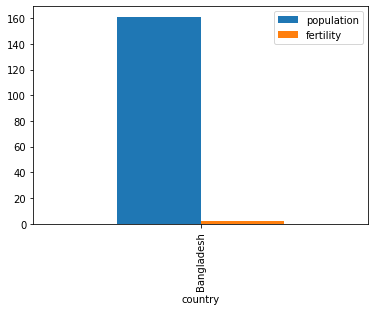

In [105]:
#df.transpose().head(1).plot.bar()
df.head(1).plot.bar()